In [11]:
import pandas as pd 

In [12]:
df = pd.read_csv("data.csv") 

In [13]:
print(df.columns)

Index(['Event Count', 'location', 'Event duration'], dtype='object')


In [14]:
print(df.head())

   Event Count                                           location  \
0            0  {'latitude': 21.0928232, 'longitude': 83.5287327}   
1            1  {'latitude': 21.1912364, 'longitude': 83.5869311}   
2            2  {'latitude': 20.1986492, 'longitude': 83.2312064}   
3            3  {'latitude': 19.891533333333335, 'longitude': ...   
4            4  {'latitude': 21.1667245, 'longitude': 83.5788649}   

   Event duration  
0        1263.998  
1         343.500  
2        1358.165  
3        2423.445  
4         496.000  


In [15]:
print(df.dtypes)

Event Count         int64
location           object
Event duration    float64
dtype: object


In [16]:
import pandas as pd
import ast

df = pd.read_csv("data.csv")

df['location'] = df['location'].apply(ast.literal_eval)

df['Latitude'] = df['location'].apply(lambda x: x['latitude'])
df['Longitude'] = df['location'].apply(lambda x: x['longitude'])

df['Event duration'] = pd.to_numeric(df['Event duration'], errors='coerce')

df[['Event Count', 'Latitude', 'Longitude', 'Event duration']].head()


,Event Count,Latitude,Longitude,Event duration
0,0,21.092823,83.528733,1263.998
1,1,21.191236,83.586931,343.500
2,2,20.198649,83.231206,1358.165
3,3,19.891533,82.065932,2423.445
4,4,21.166725,83.578865,496.000


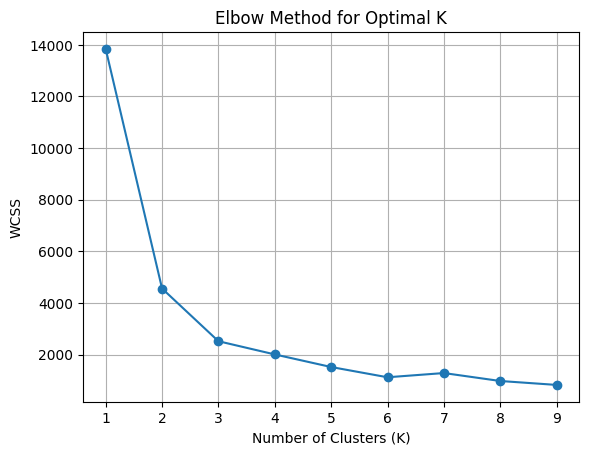

In [17]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Distance function
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to calculate Within-Cluster Sum of Squares (WCSS)
def calculate_wcss(data, centroids, labels):
    wcss = 0
    for i in range(len(data)):
        wcss += euclidean(data[i], centroids[labels[i]]) ** 2
    return wcss

# Function to assign each data point to the nearest centroid
def assign_clusters(data, centroids):
    labels = []
    for point in data:
        distances = [euclidean(point, c) for c in centroids]
        labels.append(np.argmin(distances))
    return labels

# Function to update centroids based on the mean of assigned cluster points
def update_centroids(data, labels, k):
    new_centroids = []
    for i in range(k):
        cluster_points = [data[j] for j in range(len(data)) if labels[j] == i]
        if cluster_points:
            new_centroids.append(np.mean(cluster_points, axis=0))
        else:
            new_centroids.append(random.choice(data))
    return new_centroids

data = df[['Latitude', 'Longitude']].values
wcss_values = []

# Try K from 1 to 9 for the Elbow Method
K = range(1, 10)
for k in K:
    centroids = random.sample(list(data), k)
    for _ in range(10):  # 10 iterations of K-means
        labels = assign_clusters(data, centroids)
        centroids = update_centroids(data, labels, k)
    wcss = calculate_wcss(data, centroids, labels)
    wcss_values.append(wcss)

# Plot the Elbow Method graph: K vs WCSS
plt.plot(K, wcss_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [19]:
import random

k = 3

data = list(zip(df['Latitude'], df['Longitude']))

# Randomly initialize k centroids by selecting k unique data points
centroids = random.sample(data, k)

def assign_clusters(data, centroids):
    return [min(range(k), key=lambda i: ((x - centroids[i][0])**2 + (y - centroids[i][1])**2))
            for x, y in data]

def update_centroids(data, labels, k):
    new_centroids = []
    for i in range(k):
        cluster_points = [pt for pt, lbl in zip(data, labels) if lbl == i]
        if cluster_points:
            avg_x = sum(pt[0] for pt in cluster_points) / len(cluster_points)
            avg_y = sum(pt[1] for pt in cluster_points) / len(cluster_points)
            new_centroids.append((avg_x, avg_y))
        else:
            new_centroids.append(random.choice(data))
    return new_centroids

# Run K-Means algorithm for a fixed number of iterations (e.g., 10)
for _ in range(10): 
    labels = assign_clusters(data, centroids)
    centroids = update_centroids(data, labels, k)


df['Cluster'] = labels

        Event Count Event duration               Latitude  Longitude
              count           mean         sum       mean       mean
Cluster                                                             
0              1295     523.958234  678525.913  21.293523  86.259904
1              1014     612.114179  620683.778  21.115151  83.599352
2              1183     629.722784  744962.054  19.211263  82.790723
        Event Count Event duration               Latitude  Longitude
              count           mean         sum       mean       mean
Cluster                                                             
0              1295     523.958234  678525.913  21.293523  86.259904
1              1014     612.114179  620683.778  21.115151  83.599352
2              1183     629.722784  744962.054  19.211263  82.790723


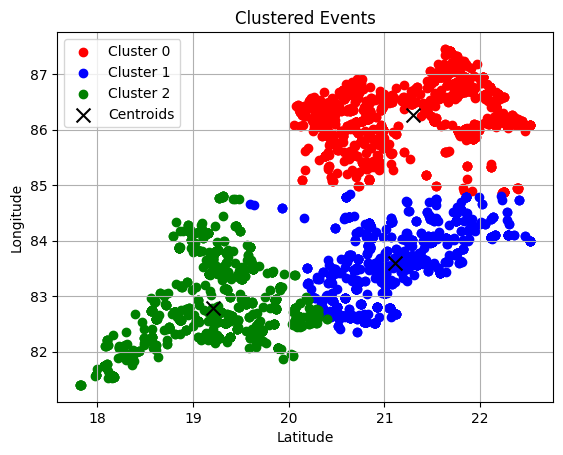

In [20]:
# Group data by cluster and calculate summary statistics
grouped = df.groupby('Cluster').agg({
    'Event Count': 'count',
    'Event duration': ['mean', 'sum'],
    'Latitude': 'mean',
    'Longitude': 'mean'
})

print(grouped)
print(grouped)

colors = ['red', 'blue', 'green', 'orange', 'purple']

# Plot each cluster’s points with a different color
for i in range(k):
    cluster_points = df[df['Cluster'] == i]
    plt.scatter(cluster_points['Latitude'], cluster_points['Longitude'], color=colors[i], label=f"Cluster {i}")

# Plot the final centroids as black X markers
plt.scatter(*zip(*centroids), color='black', marker='x', s=100, label='Centroids')

# Plot the final centroids as black X markers
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustered Events')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
df.to_csv("clustered_events.csv", index=False)